# PyDeseq2 Differential expression

In [2]:
!pip install pydeseq2

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pydeseq2 from https://files.pythonhosted.org/packages/4b/5c/85c6fb65e332b7f21d27ed22a23447d3dc41be68867bb15ff98572bcabcf/pydeseq2-0.4.9-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
   ------------------ --------------------- 20.5/44.3 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 44.3/44.3 kB 1.1 MB/s eta 0:00:00


In [26]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
data = pd.read_csv('../data/raw/GSE178491_KD.csv', sep=",")
data

,ensembl_gene_id,genename,KD1,KD2,KD3,KD4,KD5,KD6,KD7,KD8,...,control21,control22,control23,control24,control25,control26,control27,control28,control29,control30
0,ENSG00000000003,TSPAN6,34.096,110.867,115.952,46.001,78.799,50.442,67.936,119.207,...,101.013,77.324,52.875,64.080,44.872,11.007,54.490,54.658,58.676,101.360
1,ENSG00000000005,TNMD,0.000,2.000,0.000,0.000,0.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,ENSG00000000419,DPM1,399.999,287.703,309.039,167.999,168.000,696.000,250.999,193.991,...,450.579,239.047,704.000,450.001,586.970,25.000,225.271,242.000,403.965,167.999
3,ENSG00000000457,SCYL3,902.864,1008.757,976.890,765.908,998.315,1392.274,884.048,774.200,...,1029.517,1134.733,787.800,900.372,884.850,114.680,932.026,654.847,1185.912,758.495
4,ENSG00000000460,C1orf112,214.298,249.066,259.163,163.136,379.572,327.779,311.230,219.585,...,327.464,286.597,337.609,298.235,463.947,26.574,464.826,205.284,328.906,208.428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60070,ENSG00000288107,NaN,36.624,109.595,110.892,53.188,274.725,50.544,66.880,103.904,...,105.249,80.096,53.093,56.897,39.700,31.348,257.858,58.303,52.890,67.248
60071,ENSG00000288108,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
60072,ENSG00000288109,NaN,1.000,0.000,0.000,0.000,36.062,0.000,0.000,0.000,...,1.000,2.000,0.000,0.000,1.000,2.000,23.301,0.000,1.000,0.000
60073,ENSG00000288110,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [18]:
data['ensembl_gene_id'].nunique()

60075

In [17]:
data['genename'].isna().sum()

33856

In [13]:
data.sum(axis=1)

TypeError: can only concatenate str (not "float") to str

In [4]:
data.shape

(60075, 137)

In [5]:
data["genename"].value_counts()

genename
SPATA13         3
CDY1            3
PRY             3
PDE8B           2
SPICE1          2
               ..
DOK3            1
RASGEF1C        1
MMUT            1
RNF44           1
LOC105372749    1
Name: count, Length: 26129, dtype: int64

In [6]:
Data = data.groupby('genename').sum().T

In [7]:
Data.shape

(136, 26129)

In [8]:
Data.head()

genename,1-Dec,1-Mar,2-Mar,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ensembl_gene_id,ENSG00000173077,ENSG00000186205,ENSG00000117791,ENSG00000121410,ENSG00000268895,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256069,...,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549
KD1,25.902,1254.131,6.0,99.621,74.013,2.0,1.0,68.0,29.012,1.0,...,133.159,125.0,195.698,137.302,984.015,49.106,1176.065,546.538,1467.946,925.362
KD2,46.597,891.523,17.0,182.756,105.699,17.002,7.0,227.0,87.735,1.0,...,208.897,159.436,175.66,193.523,1246.134,139.495,1443.373,877.763,3228.306,1208.072
KD3,52.347,2436.721,17.071,193.547,90.815,12.019,3.0,173.0,53.978,2.0,...,130.625,46.0,113.42,112.58,978.0,97.982,2266.112,435.7,2221.344,1008.374
KD4,15.3,1339.841,2.0,120.06,50.021,3.001,6.0,65.0,27.248,0.0,...,66.974,51.999,74.03,73.97,1010.001,50.623,1253.665,890.401,1575.563,533.523


In [10]:
df_filtered = Data.loc[:, (Data > 10).all()]
df_filtered.shape

TypeError: '>' not supported between instances of 'str' and 'int'

In [24]:
trans = pd.read_csv('../data/raw/trans.csv', sep=",", index_col=0)
trans

,X1.Mar,AACS,AAGAB,AAK1,AAMP,AAR2,AARS1,AARS2,AASDH,AASDHPPT,...,ZSCAN30,ZSCAN32,ZSWIM6,ZSWIM8,ZXDA,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
KD1,0.566502,-0.399693,0.167625,-0.800987,0.702601,0.148853,0.037085,0.243377,0.320555,0.460707,...,-0.262518,-0.205354,-0.523488,-0.037085,0.359842,0.205354,-0.610592,-0.460707,-0.726531,0.111459
KD2,-0.055643,1.586959,-0.037085,1.237070,1.366803,0.523488,1.415589,1.415589,0.167625,-0.111459,...,0.419855,0.092824,0.610592,1.277943,0.130133,1.160996,0.018539,0.379692,1.321069,0.679066
KD3,1.655957,0.995280,-0.130133,1.321069,-1.091106,-0.936176,-0.320555,-0.320555,1.026176,-0.379692,...,1.125364,-0.440189,1.026176,-0.800987,-0.655902,0.167625,1.586959,-0.936176,0.340133,0.262518
KD4,0.679066,-1.026176,-0.512887,0.000000,-0.610592,-0.750885,-0.655902,-0.750885,-0.880174,-0.880174,...,0.205354,-0.750885,-0.018539,-0.853185,-1.026176,0.301099,-0.379692,0.419855,-0.523488,-0.826804
KD5,-0.359842,1.198166,-0.419855,0.965306,0.880174,0.880174,1.058083,0.880174,-0.046362,-0.460707,...,2.068794,0.826804,-0.679066,1.026176,0.679066,1.655957,-0.167625,0.633085,1.467999,0.340133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
control26,-1.586959,-1.655957,-1.655957,-1.733881,-1.655957,-1.932023,-1.655957,-1.733881,-1.733881,-1.655957,...,-1.655957,-1.655957,-1.655957,-1.733881,-1.824027,-1.733881,-1.655957,-1.586959,-1.655957,-1.733881
control27,0.205354,0.750885,0.340133,0.907819,1.415589,1.586959,1.366803,1.160996,-0.130133,0.055643,...,1.824027,0.430000,-0.936176,0.566502,0.610592,1.321069,-0.853185,-0.186456,0.800987,0.224325
control28,0.907819,-0.301099,-0.679066,-0.523488,-0.074221,-0.523488,-0.167625,-0.340133,-0.481421,-0.340133,...,-0.853185,-0.965306,-0.826804,-1.198166,-0.523488,-1.058083,-0.750885,-0.826804,-0.853185,-0.440189
control29,0.340133,-0.224325,0.679066,0.092824,0.633085,-0.243377,0.853185,0.633085,0.610592,0.320555,...,0.679066,0.320555,-0.502343,-0.523488,0.826804,0.800987,-0.460707,-1.237070,-0.167625,0.359842


<Axes: xlabel='X1.Mar', ylabel='Count'>

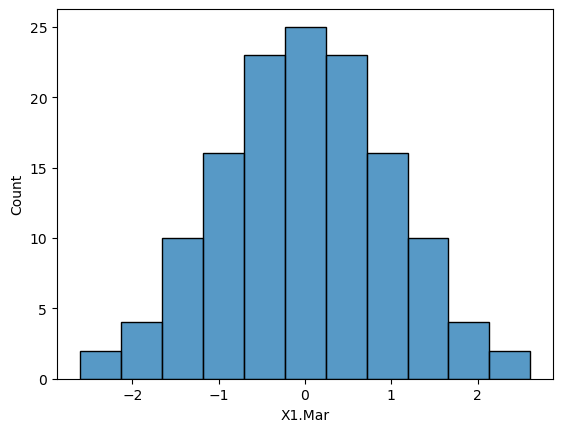

In [25]:
sns.histplot(trans.iloc[:,0])

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [32]:
a1 = np.zeros(105)
a2 = np.ones(30)

In [33]:
columns = trans.columns
X = trans
y = np.concatenate([a1, a2], 0)

In [36]:
selector = SelectKBest(f_classif, k=10) # k is the number of features to be selected
X_new = selector.fit_transform(X, y)

In [37]:
feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(2345):
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores [i])[1])

In [38]:
from scipy.stats import f

dfn = 1 # Inter-level degrees of freedom(2-1)
dfd = 7767 # Intra-level degrees of freedom(7768-1)

upper 5%: 3.8426563592313365


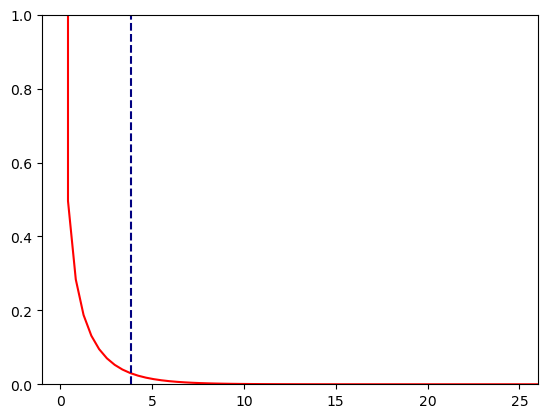

In [39]:
fig, ax = plt.subplots(1, 1)

plt.xlim(-1,26)
plt.ylim(0,1)
x = np.linspace(f.ppf(0.0000000001, dfn, dfd),f.ppf(0.9999999999, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-')
ax.axvline(f.ppf(0.95, dfn, dfd), ls = "--", color = "navy")
print('upper 5%:', f.ppf(0.95, dfn, dfd))

In [40]:
df = pd.DataFrame(num_list,index=col_list,columns=['importance'])
DE = df[df["importance"]>f.ppf(0.95, dfn, dfd)]
DE

,importance
PTAFR,60.659016
PYGL,59.604188
APOBEC3G,58.020130
LY6E,57.849574
SIRPA,57.541260
...,...
PHAX,10.712721
RALA,10.710817
PHLDB1,10.706625
PCGF5,10.705141


In [42]:
dat = trans.loc[:,DE.index]

In [43]:
dat.head()

,PTAFR,PYGL,APOBEC3G,LY6E,SIRPA,ITGB3,IGF1R,DGAT2,IL1RAP,MYADM,...,TRANK1,UBE3A,NRDC,RRM2B,CEP250,PHAX,RALA,PHLDB1,PCGF5,RBM18
KD1,0.440189,-0.130133,-0.566502,0.018539,-0.148853,-0.655902,-0.523488,0.148853,-0.359842,0.633085,...,-0.018539,-0.167625,0.018539,0.320555,-0.074221,0.243377,-0.120791,-0.633085,0.320555,0.000000
KD2,0.055643,0.074221,0.523488,-0.359842,0.481421,-0.167625,0.800987,0.186456,0.224325,0.610592,...,0.055643,0.800987,0.281756,-0.205354,1.091106,0.826804,0.502343,1.467999,-0.853185,0.205354
KD3,-0.262518,1.026176,-0.610592,-1.733881,0.588404,0.000000,0.655902,-0.111459,-0.055643,-0.419855,...,-1.237070,0.523488,1.586959,-0.148853,-0.055643,-0.243377,0.544869,1.125364,-0.523488,-0.379692
KD4,0.111459,0.460707,-0.523488,1.125364,0.074221,-0.726531,0.205354,0.853185,1.026176,0.243377,...,-0.186456,-0.965306,-0.037085,-0.880174,-0.610592,-0.907819,-1.058083,-0.523488,-0.880174,-0.826804
KD5,0.037085,-0.566502,-0.055643,0.460707,0.186456,1.237070,0.359842,-0.359842,-0.544869,0.037085,...,0.679066,0.130133,-0.440189,-1.366803,1.237070,0.379692,0.262518,0.702601,-0.092824,-0.775693


In [44]:
from statistics import mean

mean(dat.iloc[0:105,1])/mean(dat.iloc[106:135,1])

-0.2828466044737967

In [45]:
from statistics import mean

M = []
for i in range(2345):
    m = mean(dat.iloc[106:135,i])-mean(dat.iloc[0:105,i])
    M.append(m)

In [46]:
FC = pd.DataFrame([M],index =["fold_change"],columns=dat.columns).T
F = FC[abs(FC['fold_change'])>1.2]
F.shape

(49, 1)